In [5]:
import array
import pickle

def getTextFromCooc(pathToFile):
    with open(pathToFile, 'r', encoding='utf8') as f:
        indexRow = 0
        headerText = []
        docs = []
        for row in f:
            if(indexRow == 0):
                for word in row.split(','):
                    headerText.append(word)
            else:
                indexNumber = 0
                isStringCreated = False
                for word2 in row.split(','):
                    if(indexNumber == 0):
                        pass
                    else:
                        if int(word2) == 1:
                            if(isStringCreated == False):
                                string = ''
                                isStringCreated = True
                            if(string == ""):
                                string = headerText[indexNumber-1]
                            else:
                                string = string +' '+headerText[indexNumber-1]
                    indexNumber += 1
                #string = string[2:]
                docs.append(string)
                docs = [s.replace("'", '"') for s in docs] # remove all the 8s 
            indexRow +=1
    with open('./docs/textTheGoodScents.txt','wb') as f:
        pickle.dump(docs, f)
    return [docs,headerText]

docs,headerText = getTextFromCooc('./TGS/dataTGS.csv')
indice = 0
for doc in docs:
    docSplitted = doc.split(' ')
    docs[indice] = docSplitted
    indice += 1


[['anisé', 'aubépine', 'balsamique', 'cerfeuil', 'cerise', 'doux', 'fleurdacacia', 'fruité', 'poudré', 'vanille'], ['animal'], ['amande', 'balsamique', 'essence', 'floral', 'plastique'], ['amande', 'balsamique', 'essence', 'floral', 'plastique'], ['amande', 'balsamique', 'cerise', 'chimique', 'doux', 'floral', 'fruité', 'phénolé', 'rose'], ['amande', 'boisé', 'cerfeuil', 'cerise', 'doux', 'fruitàcoque', 'fruité', 'huile', 'poudré', 'sucrebrûlé'], ['ail', 'café', 'chou', 'menthé', 'oignon', 'poireau', 'raifort', 'soufré', 'tomate', 'vert'], ['acétone', 'acrylate', 'anis', 'essence', 'éther', 'plastique'], ['boisé', 'café', 'épicé', 'sciure', 'solvant'], ['herbe'], ['herbe'], ['floral', 'huile', 'médicinal', 'narcisse', 'phénolé', 'rhubarbe', 'rose', 'vert'], ['ambregris', 'boisé', 'cèdre'], ['bière', 'frais', 'levure'], ['capucine', 'coriandre', 'fleurdetroëne', 'floral', 'ozone', 'rose', 'vert', 'violette', 'zesté\n'], ['balsamique', 'épicé', 'fruité', 'noixdemuscade', 'vin'], ['balsam

In [46]:
import gensim, logging
logging.info("Start to generate model for skip gram size 300")

logging.info("Generating skip-gram 300...")
mymodel = gensim.models.Word2Vec(docs,size=300,min_count=1,sg=1,batch_words=4000)
mymodel.save("./model/word2vec300SG")

In [56]:
embedded_mat = []
for word in mymodel.wv.vocab:
    embedded_mat.append(mymodel.wv[word])

In [48]:
import numpy as np
embedded_mat = np.array(embedded_mat)
embedded_mat.shape

(381, 300)

In [64]:
for word in mymodel.wv.vocab:
    if word == 'tilleul':
        print(mymodel.wv[word])

print(mymodel.wv['tequila'])
meanDist = 0
for word in mymodel.wv.vocab:
    meanDist += mymodel.wv.distance(word,'fruité')
print(meanDist/381)

for word in mymodel.wv.vocab:
    meanDist += mymodel.wv.distance(word,'tilleul')
print(meanDist/381)

[-1.32598989e-02  1.86981214e-03  4.62208269e-03  4.86485520e-03
 -4.16305801e-03 -1.20608406e-02 -1.67072900e-02  9.58834961e-03
 -1.03040738e-02 -5.14024170e-04 -8.95881001e-03  1.00329677e-02
 -1.36086065e-02  2.58257426e-03 -6.65000267e-03  1.04200263e-02
 -1.19762598e-02 -1.16316997e-03  1.83859246e-03  6.62184972e-03
 -4.76624817e-03 -1.01415953e-02  1.45718772e-02  9.12219693e-05
 -2.19445154e-02  1.18899960e-02  2.43414734e-02  2.73245410e-03
  2.92932855e-05 -1.87961906e-02 -2.88357120e-02 -5.82769839e-03
 -8.91537964e-03 -6.37516714e-05 -4.83096670e-03  2.43071537e-03
  5.69723221e-03 -6.05529314e-03  2.54934989e-02  1.45375985e-03
  1.19565735e-02  1.11713149e-02 -2.99260542e-02  9.34982393e-03
  3.01894564e-02 -2.07700673e-03  2.84893308e-02  2.05458701e-02
 -1.16302287e-02 -5.29817585e-03  1.06346607e-02 -6.08447194e-03
  1.09511400e-02 -2.75997184e-02 -1.12925703e-02 -7.38997827e-04
  2.00125948e-02 -2.49919463e-02 -3.47719640e-02 -2.14166231e-02
 -1.94678474e-02  8.34586

[[ 4.5916700e+00  5.8178239e+00]
 [ 2.8387711e+00  4.7018366e+00]
 [ 5.2572484e+00  9.5906334e+00]
 [ 2.5284996e+00  3.4897008e+00]
 [ 4.8994184e+00  5.0871534e+00]
 [ 7.0716815e+00 -7.3093891e-01]
 [ 2.2134283e+00  4.1269822e+00]
 [ 7.3170757e+00 -1.2894199e+00]
 [ 5.3486619e+00  1.0204428e+01]
 [ 6.8592300e+00  5.9083815e+00]
 [ 2.8070252e+00  9.0403824e+00]
 [ 3.0322039e+00  4.6449828e+00]
 [-1.9893786e+00 -3.0339238e-01]
 [ 8.6105757e+00  1.8899876e+00]
 [ 1.0310934e+00  2.2241189e-01]
 [-1.7330662e+00  5.5211568e+00]
 [ 4.3642607e+00  1.0061859e+01]
 [ 7.2748747e+00  1.0581007e+00]
 [ 6.8960629e+00  9.0719433e+00]
 [-1.0825670e+01 -3.4917836e+00]
 [ 8.7322435e+00 -1.5273823e+00]
 [-4.3805494e+00 -7.5615609e-01]
 [-1.1596556e+01 -6.8057928e+00]
 [-1.1482726e+01 -4.2794867e+00]
 [-1.0172058e+01 -6.3944168e+00]
 [ 5.3774776e+00  7.8404312e+00]
 [-1.1741306e+01 -6.8607826e+00]
 [-5.5899038e+00 -4.0269828e+00]
 [-9.2675543e+00 -6.0008407e+00]
 [-1.1615559e+01 -6.8370957e+00]
 [-9.59897

D:\IDE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\IDE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


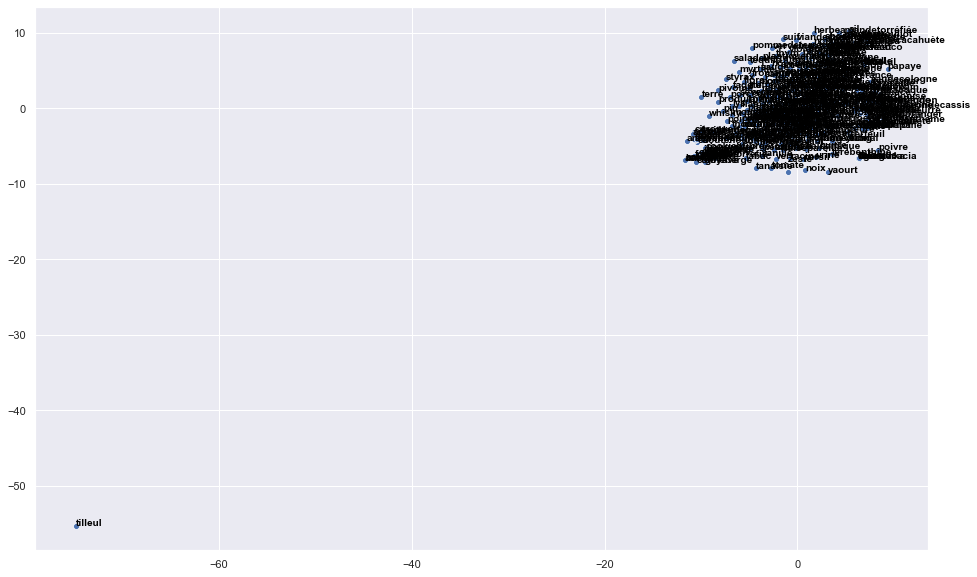

In [54]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
def getCosineMatrix(emb):
    matrix = pairwise_distances(emb,emb, metric='cosine', n_jobs=-1)
    return matrix

cosine_matrix = getCosineMatrix(embedded_mat)


X_embedded = TSNE(n_components=2,metric='precomputed').fit_transform(cosine_matrix)
X_embedded.shape

print(X_embedded)
df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
for line in range(0,embedded_mat.shape[0]):
     p1.text(df_subset['tsne-2d-one'][line]+0.01, df_subset['tsne-2d-two'][line], 
     headerText[line], horizontalalignment='left', 
     size='small', color='black', weight='semibold')
